### Analysis On Future Generation of Tennis:

This project basically seeks the idea to analyze data from men’s ATP tennis competitions from the year 2020 up to 2021, 
including Grand Slams, Masters Series, Masters Cup and International Series competitions.

The huge 20 years dataset prepared by Jeff Sackmann contains information on every single match played since 2000. 
with details on every match’s date, location, tournament type, surface, winner and loser, games/sets played, duration and additional statistics such as players’ rankings, players’ age and height, aces, double faults, break points faced and saved, service points among other helpful stats for both players of the match.

The objective of this analysis is to come up with insights regarding the the top players exlcluding the BIG 3 (`Djokovic` `Nadal`, `Federer`. Including correlation between variables (e.g. aces and break points won rtc) as well as the evolution of the players over time, trying different variables and using different types of visualizations as tools for understanding and interpretation of the data and communication of the results.

#### 1. Importing Basic Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
from scipy.stats import skew
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
plt.style.use('fivethirtyeight')

#### 2. Creating columns we need

In [4]:
cols = [
    'tourney_id', 
    'tourney_name', 
    'surface', 
    'draw_size', 
    'tourney_level',
    'tourney_date', 
    'match_num', 
    'winner_id', 
    'winner_seed', 
    'winner_entry',
    'winner_name',
    'winner_hand', 
    'winner_ht', 
    'winner_ioc', 
    'winner_age', 
    'winner_rank', 
    'winner_rank_points', 
    'loser_id',
    'loser_seed',
    'loser_entry',
    'loser_name',
    'loser_hand',
    'loser_ht',
    'loser_ioc',
    'loser_age',
    'loser_rank',
    'loser_rank_points',
    'score',
    'best_of', 
    'round',
    'minutes', 
    'w_ace', 
    'w_df', 
    'w_svpt',
    'w_1stIn', 
    'w_1stWon', 
    'w_2ndWon',
    'w_SvGms', 
    'w_bpSaved', 
    'w_bpFaced',
    'l_ace',
    'l_df',
    'l_svpt',
    'l_1stIn',
    'l_1stWon',
    'l_2ndWon',
    'l_SvGms',
    'l_bpSaved',
    'l_bpFaced'
]

### 3. Data Engineering 

#### 3.1. Loading all the datasets and combining them into one, calling it "ltennis".

In [5]:
ltennis = pd.concat([
    pd.read_csv('atp_matches_2000.csv', usecols=cols),
    pd.read_csv('atp_matches_2001.csv', usecols=cols),
    pd.read_csv('atp_matches_2002.csv', usecols=cols),
    pd.read_csv('atp_matches_2003.csv', usecols=cols),
    pd.read_csv('atp_matches_2004.csv', usecols=cols),
    pd.read_csv('atp_matches_2005.csv', usecols=cols),
    pd.read_csv('atp_matches_2006.csv', usecols=cols),
    pd.read_csv('atp_matches_2007.csv', usecols=cols),
    pd.read_csv('atp_matches_2008.csv', usecols=cols),
    pd.read_csv('atp_matches_2009.csv', usecols=cols),
    pd.read_csv('atp_matches_2010.csv', usecols=cols),
    pd.read_csv('atp_matches_2011.csv', usecols=cols),
    pd.read_csv('atp_matches_2012.csv', usecols=cols),
    pd.read_csv('atp_matches_2013.csv', usecols=cols),
    pd.read_csv('atp_matches_2014.csv', usecols=cols),
    pd.read_csv('atp_matches_2015.csv', usecols=cols),
    pd.read_csv('atp_matches_2016.csv', usecols=cols),
    pd.read_csv('atp_matches_2017.csv', usecols=cols),
    pd.read_csv('atp_matches_2018.csv', usecols=cols),
    pd.read_csv('atp_matches_2019.csv', usecols=cols),
    pd.read_csv('atp_matches_2020.csv', usecols=cols),
    pd.read_csv('atp_matches_2021.csv', usecols=cols),

],ignore_index=True) #have to make sure that the index will not be duplicated

ltennis.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
64030,2021-5053,Belgrade,Clay,32,A,20210419,276,106121,NaN,LL,...,51.0,30.0,10.0,10.0,7.0,11.0,126.0,629.0,105.0,763.0
64031,2021-5053,Belgrade,Clay,32,A,20210419,275,105643,NaN,NaN,...,52.0,33.0,16.0,13.0,7.0,11.0,84.0,919.0,89.0,883.0
64032,2021-5053,Belgrade,Clay,32,A,20210419,273,105936,5.0,NaN,...,58.0,42.0,22.0,16.0,9.0,13.0,33.0,1683.0,63.0,1039.0
64033,2021-5053,Belgrade,Clay,32,A,20210419,272,110748,NaN,WC,...,37.0,18.0,7.0,8.0,5.0,10.0,134.0,551.0,90.0,875.0
64034,2021-5053,Belgrade,Clay,32,A,20210419,271,106065,NaN,NaN,...,28.0,18.0,8.0,8.0,1.0,4.0,94.0,816.0,196.0,354.0


In [6]:
ltennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64035 entries, 0 to 64034
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          64035 non-null  object 
 1   tourney_name        64035 non-null  object 
 2   surface             63837 non-null  object 
 3   draw_size           64035 non-null  int64  
 4   tourney_level       64035 non-null  object 
 5   tourney_date        64035 non-null  int64  
 6   match_num           64035 non-null  int64  
 7   winner_id           64035 non-null  int64  
 8   winner_seed         26562 non-null  float64
 9   winner_entry        7728 non-null   object 
 10  winner_name         64035 non-null  object 
 11  winner_hand         64017 non-null  object 
 12  winner_ht           57271 non-null  float64
 13  winner_ioc          64035 non-null  object 
 14  winner_age          64023 non-null  float64
 15  loser_id            64035 non-null  int64  
 16  lose

In [7]:
ltennis['tourney_date'] = pd.to_datetime(ltennis.tourney_date, format='%Y%m%d')
ltennis = ltennis.sort_values(['tourney_date'])

In [8]:
ltennis['tourney_yearmonth'] = ltennis.tourney_date.astype(str).str[:6]
ltennis['tourney_year'] = ltennis.tourney_date.astype(str).str[:4]
ltennis['tourney_year'] = ltennis['tourney_year'].astype(int)

#### 3.2. So the basic goal of this analysis is to analyse the top 7 players, their mentality and their basic statistics on each surface as well as Big Tournaments.
### "Excluding the big three"
- "Novak Djokovic"
- "Rafael Nadal"
- "Roger Federer"

So Here are the top players currently in ATP Rankings (May 2021):

-	 Novak Djokovic
-	 Rafael Nadal 
-	 Daniil Medvedev
-	 Dominic Thiem 
-	 Stefanos Tsitsipas 
-	 Alexander Zverev 
-	 Andrey Rublev 
-    Roger Federer 
-	 Diego Schwartzman 
-	 Matteo Berrettini 

#### Since we are doing solely an analysis of THESE players, we only need the rows with these players in it. 

We can filter this by looking at the name of the winner or loser. It has to be 'the given name'. (excluding the BIG THREE)

#### 3.3. Making a top7 dataframe for further analysis us looking at the winner and loser name both and combining them in the end.

In [9]:
top7 = ltennis[(ltennis.winner_name.isin([
'Daniil Medvedev',
'Dominic Thiem',
'Stefanos Tsitsipas',
'Alexander Zverev',
'Andrey Rublev',
'Diego Schwartzman',
'Matteo Berrettini'])) | (ltennis.loser_name.isin([
'Daniil Medvedev',
'Dominic Thiem',
'Stefanos Tsitsipas',
'Alexander Zverev',
'Andrey Rublev',
'Diego Schwartzman',
'Matteo Berrettini']))]

#### 3.4. Checking for null or missing values.

In [10]:
top7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 37483 to 63980
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tourney_id          1966 non-null   object        
 1   tourney_name        1966 non-null   object        
 2   surface             1966 non-null   object        
 3   draw_size           1966 non-null   int64         
 4   tourney_level       1966 non-null   object        
 5   tourney_date        1966 non-null   datetime64[ns]
 6   match_num           1966 non-null   int64         
 7   winner_id           1966 non-null   int64         
 8   winner_seed         1208 non-null   float64       
 9   winner_entry        184 non-null    object        
 10  winner_name         1966 non-null   object        
 11  winner_hand         1966 non-null   object        
 12  winner_ht           1249 non-null   float64       
 13  winner_ioc          1966 non-null   object 

#### so there are no null values, so we can proceed further for our analysis.

#### 3.5. Let's make a few adjustments to the dataframes, as we have to do a long detailed analysis, we will need a lot of dataframes containing as much information it can. 
so lets separate/manipulate different dataframes in some ways it will help us ahead.

#### 3.5.1. Separating the data frames in "win" and "losses" for further individial analysis:

In [11]:
top7_wins = top7[top7.winner_name.isin([
'Daniil Medvedev',
'Dominic Thiem',
'Stefanos Tsitsipas',
'Alexander Zverev',
'Andrey Rublev',
'Diego Schwartzman',
'Matteo Berrettini'])]
top7_losses = top7[top7.loser_name.isin([
'Daniil Medvedev',
'Dominic Thiem',
'Stefanos Tsitsipas',
'Alexander Zverev',
'Andrey Rublev',
'Diego Schwartzman',
'Matteo Berrettini'])]

#### 3.5.2. Making columns for Tournament Date, winner Name, Winner's seed at that point of time:

In [12]:
top7_wins = top7_wins[['tourney_date', 'winner_name', 'winner_rank']]
top7_losses = top7_losses[['tourney_date', 'loser_name', 'winner_rank']]

#### Combining the Winners And Losers name from the "top7_wins" dataframe to "Players"
this isi how we can seperate our dataframe's data > Playerwise. (It was matchwise yet as we know we have 21 years of match data here)  

In [13]:
top7_wins.columns = ['Date','Player','Rank']
top7_losses.columns = ['Date','Player', 'Rank']

#### 3.5.3. Combining them both:

In [14]:
top7 = pd.concat([top7_wins, top7_losses], sort=False)

In [15]:
top7.Rank = top7.Rank.astype(int)
top7 = top7[top7.Rank < 100]

#### 3.5.4. Converting the date function to it's proper format as "Year/Month/Date" which will help us in further analysis by using the "datetime" function:

In [16]:
top7['Date'] = pd.to_datetime(top7.Date, format='%Y%m%d')
top7 = top7.sort_values(['Date'])

#### 3.5.5. Making new dataframes to individual "PLAYERS", as we will need it ahead for individual analysis:

In [17]:
medvedev = top7[top7.Player == 'Daniil Medvedev']
thiem = top7[top7.Player == 'Dominic Thiem']
tsitsipas = top7[top7.Player == 'Stefanos Tsitsipas']
zverev = top7[top7.Player == 'Alexander Zverev']
rublev = top7[top7.Player == 'Andrey Rublev']
schwartzman = top7[top7.Player == 'Diego Schwartzman']
berrettini = top7[top7.Player == 'Matteo Berrettini']

#### 3.5.6. Checking for the players unique content, as it should be there with only the 7 players we have selected for our analysis:

In [18]:
top7.Player.unique()

array(['Dominic Thiem', 'Diego Schwartzman', 'Alexander Zverev',
       'Andrey Rublev', 'Daniil Medvedev', 'Stefanos Tsitsipas',
       'Matteo Berrettini'], dtype=object)

#### OKAY, So we have our desired players list and their respective data frames!

#### 4. Basic Rank Analysis with some plots.

#### 4.1.1. Plotting the Rank Evolution of the Top-3 Players in "TOP 10" : `Daniil Medvedev` `Dominic Thiem` `Stefanos Tsitsipas`

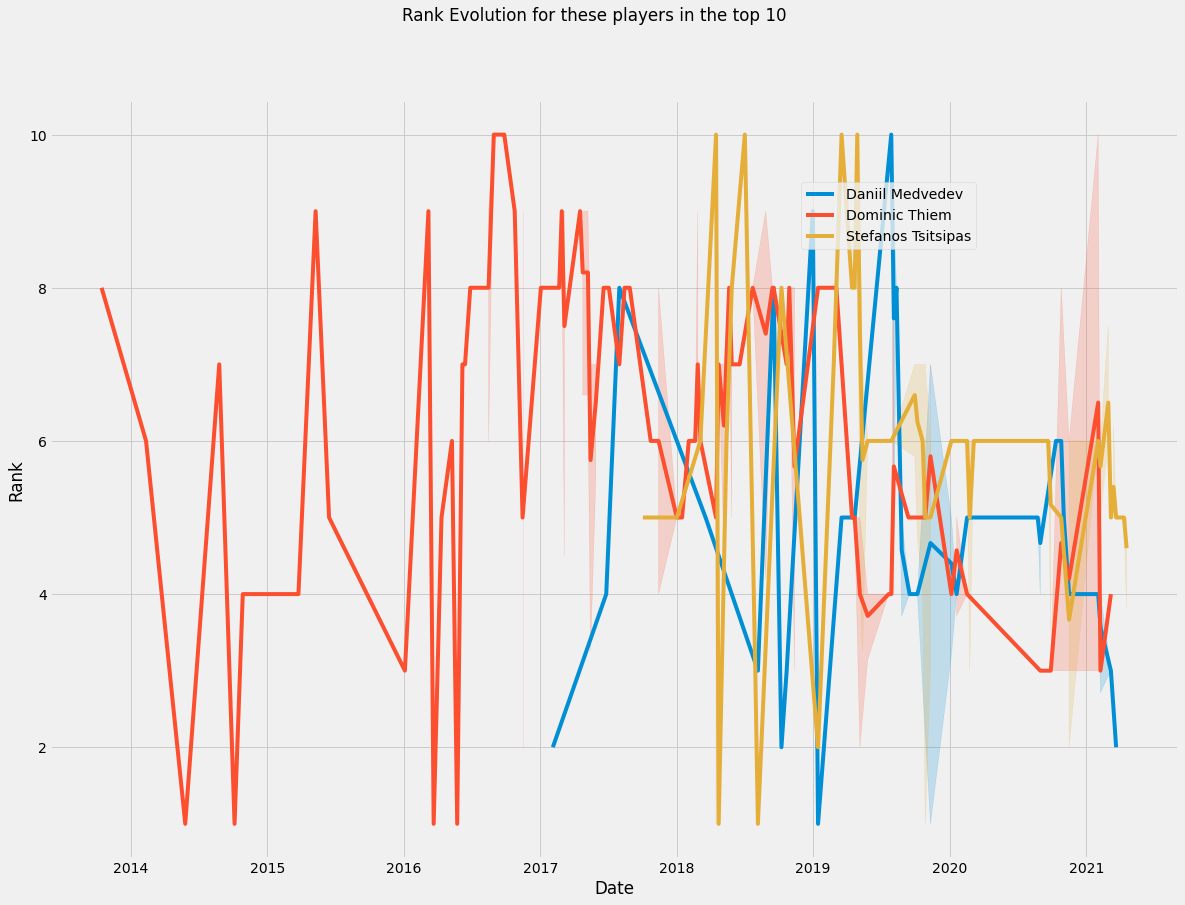

In [19]:
fig = plt.figure(figsize=(18,13))

sns.lineplot(x='Date', y='Rank', data=medvedev[medvedev.Rank <=10])
sns.lineplot(x='Date', y='Rank', data=thiem[thiem.Rank <=10])
sns.lineplot(x='Date', y='Rank', data=tsitsipas[tsitsipas.Rank <=10])

fig.legend(bbox_to_anchor=(-0.2, 0.8, 1., 0), labels=[
'Daniil Medvedev',
'Dominic Thiem',
'Stefanos Tsitsipas'
])
t=fig.suptitle('Rank Evolution for these players in the top 10')

#### 4.2.2. Plotting the Rank Evolution of the Top-3 Players in "All Time" : `Daniil Medvedev` `Dominic Thiem` `Stefanos Tsitsipas`

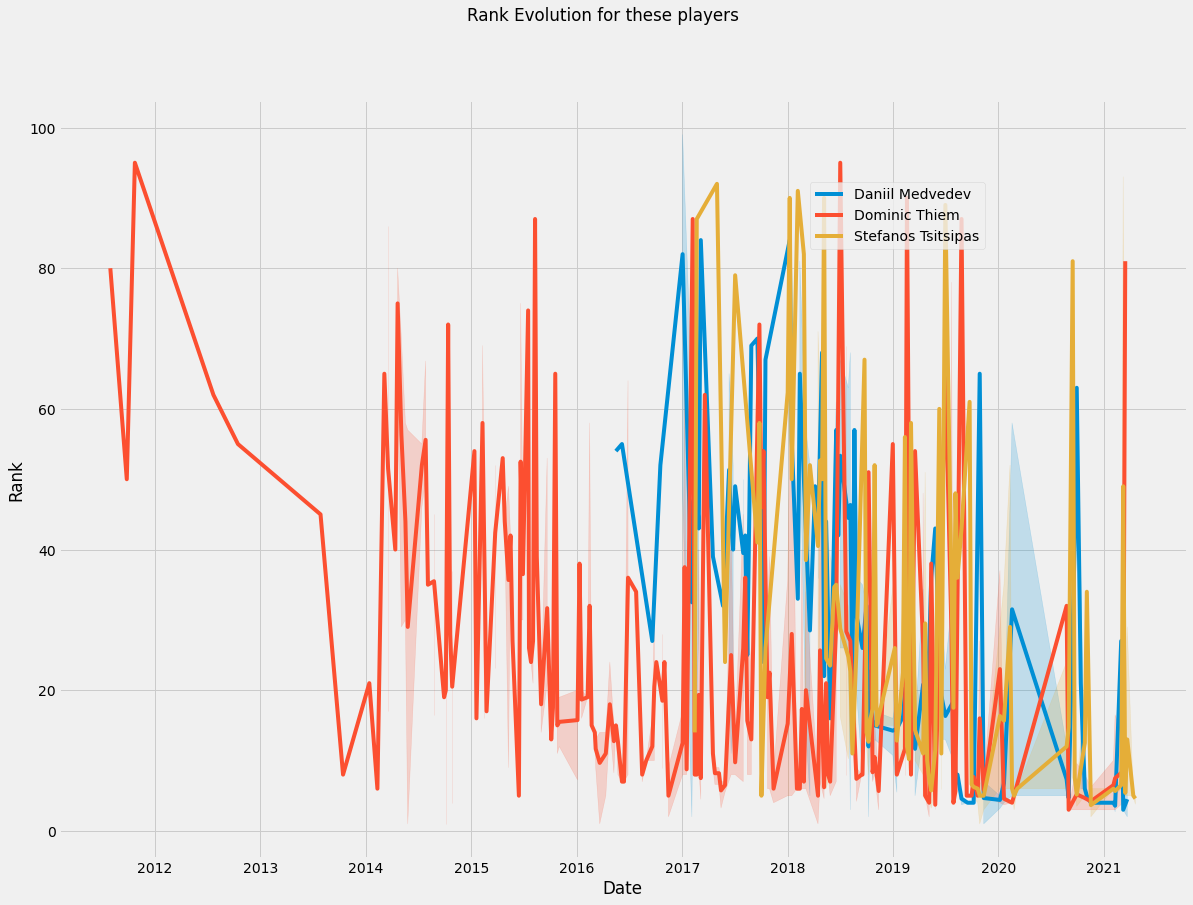

In [20]:
fig = plt.figure(figsize=(18,13))
sns.lineplot(x='Date', y='Rank', data=medvedev)
sns.lineplot(x='Date', y='Rank', data=thiem)
sns.lineplot(x='Date', y='Rank', data=tsitsipas)
fig.legend(bbox_to_anchor=(-0.2, 0.8, 1., 0), labels=['Daniil Medvedev','Dominic Thiem','Stefanos Tsitsipas'])
t=fig.suptitle('Rank Evolution for these players')

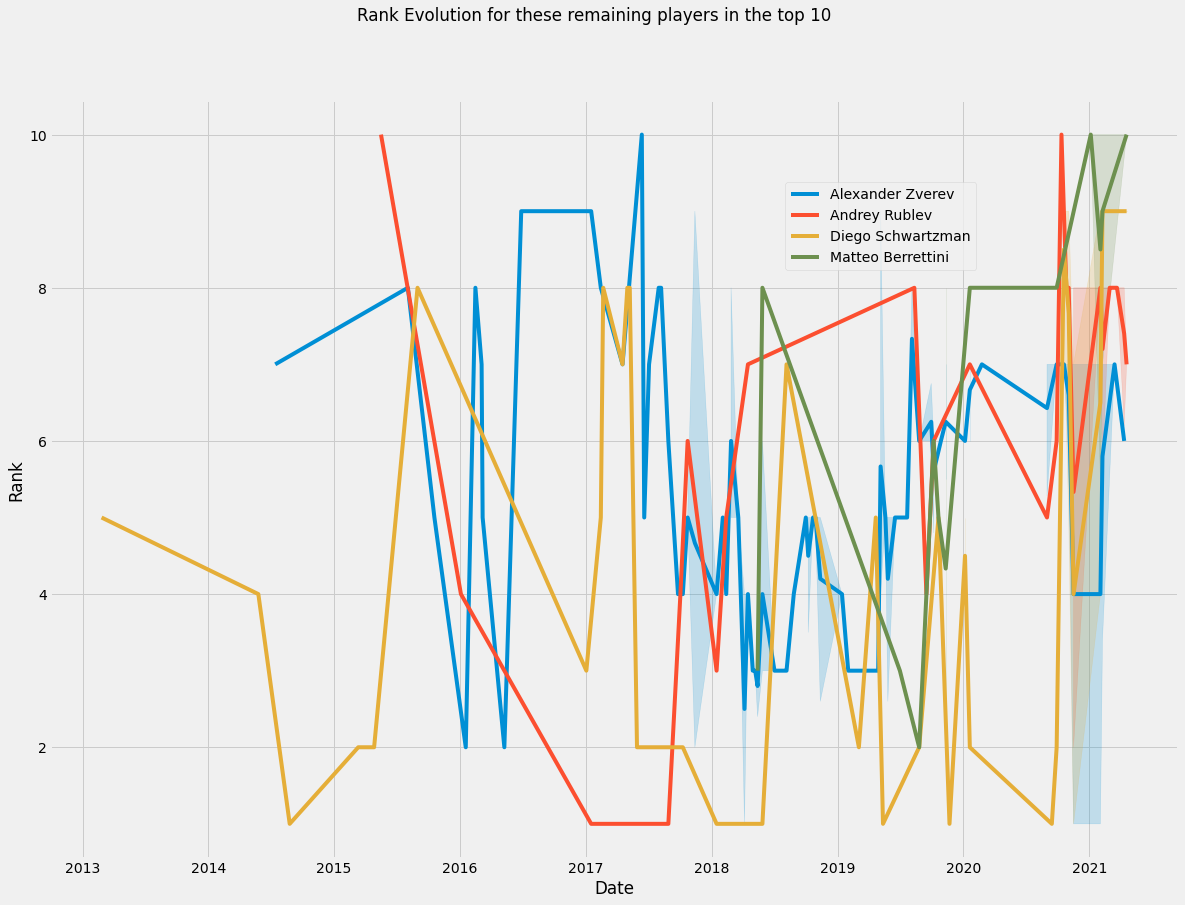

In [21]:
fig = plt.figure(figsize=(18,13))

sns.lineplot(x='Date', y='Rank', data=zverev[zverev.Rank <=10])
sns.lineplot(x='Date', y='Rank', data=rublev[rublev.Rank <=10])
sns.lineplot(x='Date', y='Rank', data=schwartzman[schwartzman.Rank <=10])
sns.lineplot(x='Date', y='Rank', data=berrettini[berrettini.Rank <=10])

fig.legend(bbox_to_anchor=(-0.2, 0.8, 1., 0), labels=[
'Alexander Zverev',
'Andrey Rublev',
'Diego Schwartzman',
'Matteo Berrettini'
])
t=fig.suptitle('Rank Evolution for these remaining players in the top 10')

#### Insights:
- as we can see that being the oldest `Dominic Thiem` enters the top players sooner than the other two players.
- Theim was also present in the era when all of the tournaments were dominated by the big3.
- if we see about 2021 the big 3 isnt really dominating much and the entry of other players are very much easy as compared to Thiem when he was in 2012.
- All the 3 players never went out of the top 10 after they entered. considering Thiem with the longest top 10 reign since 2014.
- There's 1 year gap between `Daniil Medvedev` and `Stefanos Tsitsipas`'s entry in the top players.
- `Diego Schwartzman` And `Dominic Thiem` came up in the top players at a similar time.
- `Andrey Rublev` and `Alexander Zverev` being the most inconsistant of the top players as the graph is Disrupted many times
- `Matteo Berrettini` being the lastest entry in the top players.


#### 4.3 let's create another data frame for annual year wins and losses for these players:


In [22]:
top7_annual = ltennis[(ltennis.winner_name.isin([
'Daniil Medvedev',
'Dominic Thiem',
'Stefanos Tsitsipas',
'Alexander Zverev',
'Andrey Rublev',
'Diego Schwartzman',
'Matteo Berrettini'])) | (ltennis.loser_name.isin([
'Daniil Medvedev',
'Dominic Thiem',
'Stefanos Tsitsipas',
'Alexander Zverev',
'Andrey Rublev',
'Diego Schwartzman',
'Matteo Berrettini']))]

In [23]:
top7_wins_annual = top7_annual[top7_annual.winner_name.isin([
'Daniil Medvedev',
'Dominic Thiem',
'Stefanos Tsitsipas',
'Alexander Zverev',
'Andrey Rublev',
'Diego Schwartzman',
'Matteo Berrettini'])]
top7_losses_annual = top7_annual[top7_annual.loser_name.isin([
'Daniil Medvedev',
'Dominic Thiem',
'Stefanos Tsitsipas',
'Alexander Zverev',
'Andrey Rublev',
'Diego Schwartzman',
'Matteo Berrettini'])]

#### 4.4. Plotting Bar Graphs For Total Wins & Total Losses By These Players:

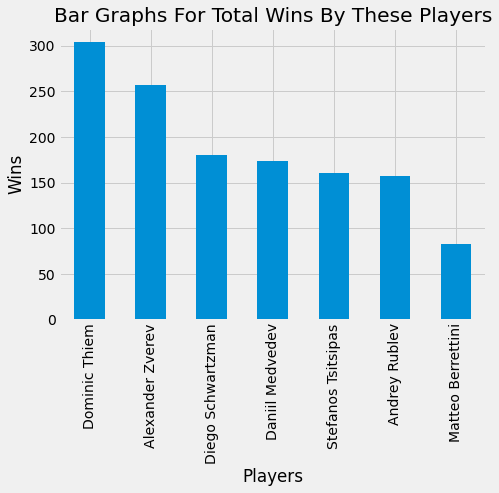

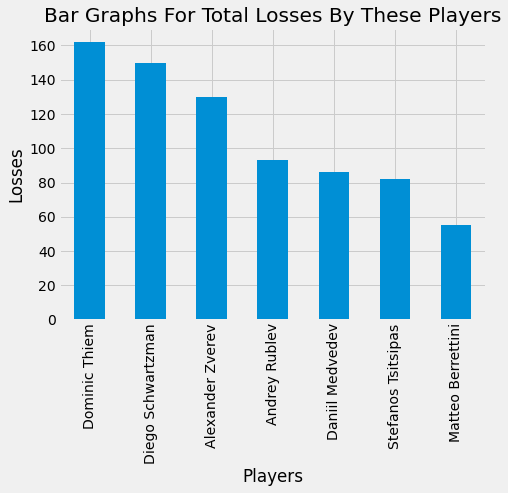

In [24]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt1 = top7_wins_annual.winner_name.value_counts().plot(kind='bar')
plt.title('Bar Graphs For Total Wins By These Players')
plt1.set(xlabel = 'Players', ylabel='Wins')

plt.figure(figsize=(15, 5))

plt.subplot(1,2,2)
plt1 = top7_losses_annual.loser_name.value_counts().plot(kind='bar')
plt.title('Bar Graphs For Total Losses By These Players')
plt1.set(xlabel = 'Players', ylabel='Losses')
plt.show()


#### Insights:
- `Dominic Thiem` and `Diego Schwartzman` have the most wins and losses as a pro being the oldest players in the lot.
- `Alexander Zverev` being the middle of the charts in both.
- `Berretini` being the youngest entry in the top seeds is at the lowest losses and wins, played considerably the less amounts of games as well.

#### 4.5. Plotting a boxplot to see the aces on different surfaces:

[Text(0.5, 0, 'Surface'), Text(0, 0.5, 'Aces')]

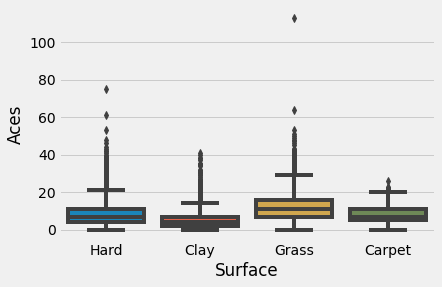

In [25]:
ltennisace = ltennis[ltennis['tourney_level'].astype(str).isin(['G','M'])].copy()
ltennisace['w_ace'] = ltennisace['w_ace'].astype(float)
g = sns.boxplot(x="surface", y="w_ace", data=ltennisace)
g.set(xlabel='Surface', ylabel='Aces')

#### Insights:
- `Grass`has the best ace ratio as compared to the other surfaces.

#### Creating some base dataframes for all the top 7 players we need for our analysis further 

In [26]:
base3 = top7_wins_annual[['tourney_date', 'winner_name','winner_name', 'winner_rank','tourney_name','tourney_level','winner_seed','round','w_bpSaved','w_ace','minutes','w_df','w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon','l_SvGms','tourney_id','surface']]  
base4 = top7_losses_annual[['tourney_date', 'loser_name','loser_name', 'winner_rank','tourney_name','tourney_level','winner_seed','round','w_bpSaved','w_ace','minutes','w_df','w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon','l_SvGms','tourney_id','surface']]

In [27]:
base3.columns = ['Date','Player','winner_name','Rank','Tournament','Tournament_Level','Winner Seed','Round','w_bpSaved','w_ace','minutes','w_df','w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon','l_SvGms','tourney_id','surface']
base4.columns = ['Date','Player','loser_name', 'Rank','Tournament','Tournament_Level','Winner Seed','Round','w_bpSaved','w_ace','minutes','w_df','w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon','l_SvGms','tourney_id','surface']

In [28]:
indiv_w = top7_wins_annual[['tourney_date', 'winner_name', 'winner_rank','tourney_name','tourney_level','winner_seed','round','w_bpSaved','w_ace','minutes','w_df','w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms','tourney_id','surface']]  
indiv_l = top7_losses_annual[['tourney_date', 'loser_name', 'winner_rank','tourney_name','tourney_level','winner_seed','round','l_bpSaved','l_ace','minutes','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon','l_SvGms','tourney_id','surface']]

In [29]:
indiv_w['tourney_date'] = pd.to_datetime(indiv_w.tourney_date, format='%Y%m%d')
indiv_w = indiv_w.sort_values(['tourney_date'])

In [30]:
indiv_l['tourney_date'] = pd.to_datetime(indiv_l.tourney_date, format='%Y%m%d')
indiv_l = indiv_l.sort_values(['tourney_date'])

In [31]:
indiv_w = indiv_w.loc[~indiv_w.index.duplicated(keep='first')]
indiv_l = indiv_l.loc[~indiv_l.index.duplicated(keep='first')]

In [32]:
dbase7ind = pd.concat([indiv_w, indiv_l], sort=False)

In [33]:
dbase = pd.concat([base3, base4], sort=False)

In [34]:
dbase7 = pd.concat([base3, base4], sort=False)

### 5. Grand Slam Analysis 

#### Referred to as majors, are the world's `four` most important annual tennis events. 
#### The tournaments offer the most ranking points, prize money, public and media attention, the greatest strength and size of field, and greater number of "best of" sets for men, which is 5. 
The Grand Slam itinerary consists of the: 
- `Australian Open` in mid January 
- `the French Open` from late May to early June
- `Wimbledon` in late June to early July
- `US Open` in August–September

#### Each tournament is played over a two-week period.

#### The Australian and the United States tournaments are played on `hard courts`, the French on `clay`, and Wimbledon on `natural grass`.

#### 5.1. making a combined data set for GRAND SLAMS by filtering out the match_level to grandslams:

In [35]:
gslams= ltennis[['tourney_date','tourney_name','tourney_level', 'round', 'winner_name','loser_name']]

In [36]:
gslams = gslams[(gslams.tourney_level == 'G')]

#### 5.2. as ltennis dataframe has all the 20 years worth data and a lot of players we don't need as we are doing our analysis for top players excluding the big three,
so we filter out the names from the df we created and we will now have the desired df with our players and their grandslam records:

In [37]:
gslams = gslams[gslams.winner_name.isin(['Daniil Medvedev',
'Dominic Thiem',
'Stefanos Tsitsipas',
'Alexander Zverev',
'Andrey Rublev',
'Diego Schwartzman',
'Matteo Berrettini'])]

#### 5.3. Plotting a Bar Graph For Total Wins By These Players in GRAND SLAM Matches

[Text(0.5, 0, 'Players'), Text(0, 0.5, 'Wins')]

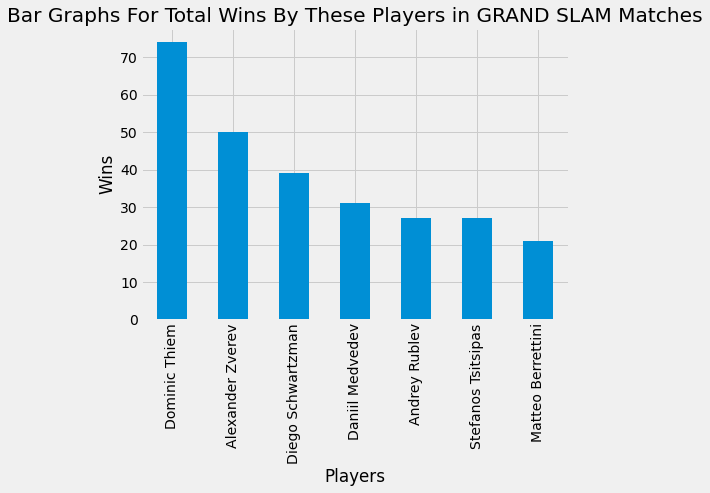

In [38]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt1 = gslams.winner_name.value_counts().plot(kind='bar')
plt.title('Bar Graphs For Total Wins By These Players in GRAND SLAM Matches')
plt1.set(xlabel = 'Players', ylabel='Wins')


#### Insights:
- `Dominic Thiem` and `Diego Schwartzman` (3rd) have the most wins and losses as a pro being the oldest players in the lot.
- 2nd `Alexander Zverev` performs well in Big Tournaments as he is very young as well and played considerably very less matches.
- `Daniil Medvedev` also performs well if we exclude players who are older. He's probably the best according to the graphs.
- `Tsitsipas`being the youngest by age, performs well but not quite good in comparison to these players.

#### 5.3. Plotting a Bar Graph For Total Finals Played By These Players in GRAND SLAMS

In [39]:
pslams_f= dbase[['Date','Player','winner_name','Rank','Tournament','Tournament_Level','Winner Seed','Round']]

In [40]:
pslams_f = pslams_f[(pslams_f.Tournament_Level == 'G') & (pslams_f.Round == 'F')]

[Text(0.5, 0, 'Players'), Text(0, 0.5, 'Total Finals Played')]

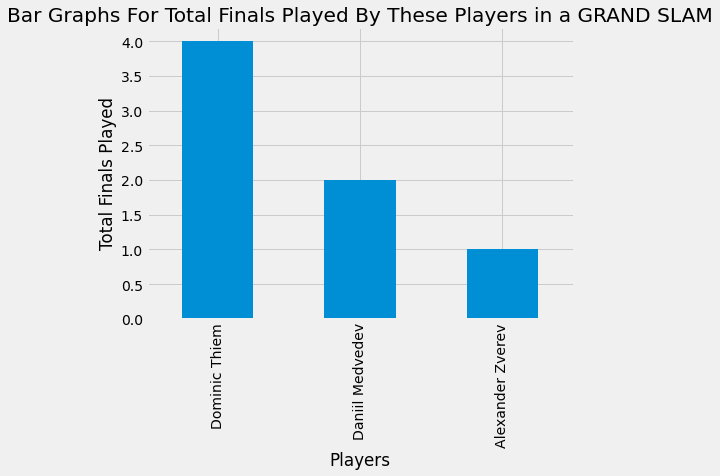

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt1 = pslams_f.Player.value_counts().plot(kind='bar')
plt.title('Bar Graphs For Total Finals Played By These Players in a GRAND SLAM')
plt1.set(xlabel = 'Players', ylabel='Total Finals Played')

#### Insights:
- Only 3 players have played a grand slam final from the group of players we have.
    - `Alexander Zverev`
    - `Daniil Medvedev`
    - `Dominic Thiem` having the best records (Also won the US Open against the finalist `Zverev`)
    

In [42]:
pslams_f.head()

,Date,Player,winner_name,Rank,Tournament,Tournament_Level,Winner Seed,Round
62493,2020-08-31,Dominic Thiem,Dominic Thiem,3.0,Us Open,G,2.0,F
57546,2018-05-28,Dominic Thiem,NaN,1.0,Roland Garros,G,1.0,F
60224,2019-05-27,Dominic Thiem,NaN,2.0,Roland Garros,G,2.0,F
61071,2019-08-26,Daniil Medvedev,NaN,2.0,US Open,G,2.0,F
61967,2020-01-20,Dominic Thiem,NaN,2.0,Australian Open,G,2.0,F


#### 5.4. Plotting a Bar Graph For Total "SEMI-FINALS" Played By These Players in GRAND SLAMS

In [43]:
pslams_sf= dbase[['Date','Player','winner_name','Rank','Tournament','Tournament_Level','Winner Seed','Round']]

In [44]:
pslams_sf = pslams_sf[(pslams_sf.Tournament_Level == 'G') & (pslams_sf.Round == 'SF')]

[Text(0.5, 0, 'Players'), Text(0, 0.5, 'Total Semi-Finals Played')]

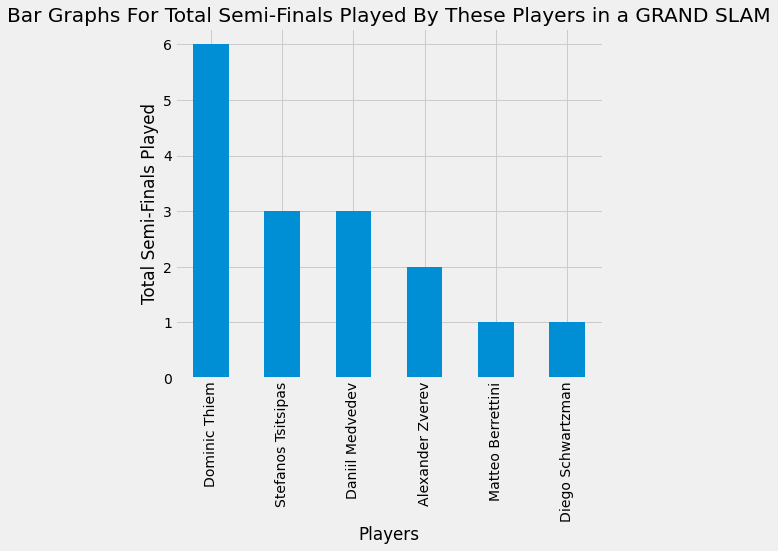

In [45]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt2 = pslams_sf.Player.value_counts().plot(kind='bar')
plt.title('Bar Graphs For Total Semi-Finals Played By These Players in a GRAND SLAM')
plt2.set(xlabel = 'Players', ylabel='Total Semi-Finals Played')

#### Insights:
- `Thiem` again playing the highest number of semi finals as a pro.
- `Tsitsipas` being the second is a strange thing, also shows how good he is with the age but is not able to cope with immense pressure you have to face in grand slams to convert your semis to finals. He has played 3 semi finals but he's yet to play 1!
- `Berretini` according to his age is doing well as he has played 1!
- `Schwartzman` on the other hand has played just 1 semi final at his age and experience!

### 6. Individual Grand Slam Analysis:

#### 6.1. Performances in The Australian Open (Hard Court)

#### 6.1.1 Plotting Bar Graphs For Total Wins & Total Losses By These Players in Australian Open

In [46]:
aus= dbase[['Date','Player','winner_name','Rank','Tournament','Tournament_Level','Winner Seed','Round','loser_name']]

In [47]:
aus = aus[(aus.Tournament == 'Australian Open')]

[Text(0.5, 0, 'Players'), Text(0, 0.5, 'Wins in AO')]

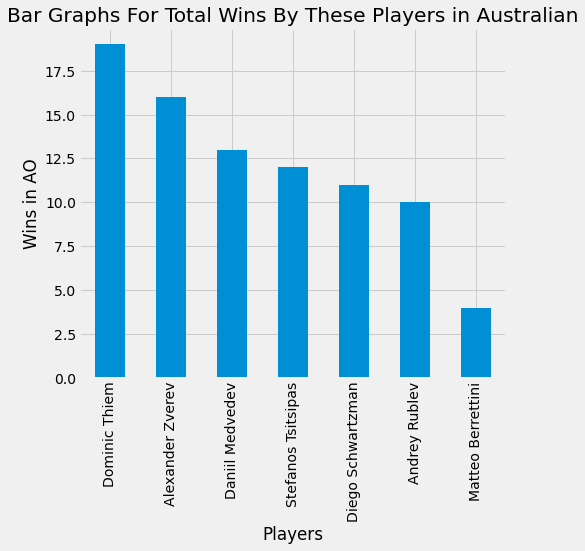

In [48]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt2 = aus.winner_name.value_counts().plot(kind='bar')
plt.title('Bar Graphs For Total Wins By These Players in Australian')
plt2.set(xlabel = 'Players', ylabel='Wins in AO')

[Text(0.5, 0, 'Players'), Text(0, 0.5, 'losses in AO')]

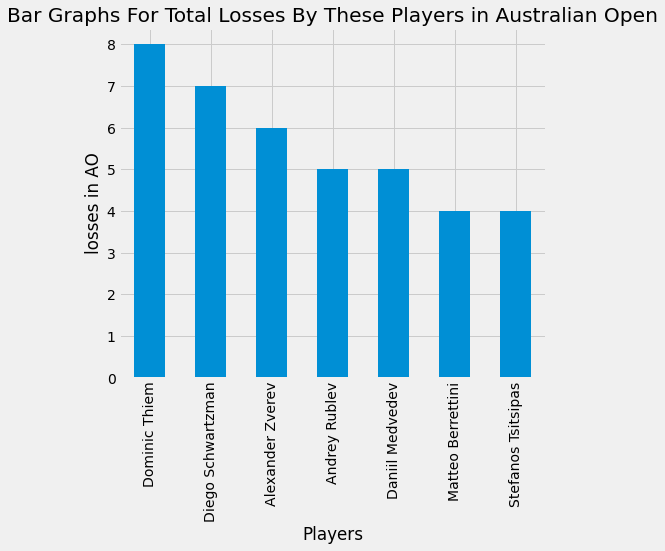

In [49]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt2 = aus.loser_name.value_counts().plot(kind='bar')
plt.title('Bar Graphs For Total Losses By These Players in Australian Open')
plt2.set(xlabel = 'Players', ylabel='losses in AO')

#### Insights:
- `Dominic Thiem` and `Diego Schwartzman` (5th in losses) have the most wins and losses as a pro being the oldest players in the lot.
- 2nd `Alexander Zverev` performs well in Big Tournaments Proves again as he is very young as well and played considerably very less matches than `Thiem` and `Diego`.
- `Daniil Medvedev` also performs well on hard court surface.
- `Tsitsipas`being the youngest by age, performs well but not quite good in comparison to these players being the 4th on list.

### 6.2. Performances in The Roland Garros (Clay)

#### 6.2.1 Plotting Bar Graphs For Total Wins & Total Losses By These Players in Roland Garros

In [50]:
rg = dbase[['Date','Player','winner_name','Rank','Tournament','Tournament_Level','Winner Seed','Round','loser_name']]

In [51]:
rg = rg[(rg.Tournament == 'Roland Garros')]

[Text(0.5, 0, 'Players'), Text(0, 0.5, 'Wins in Roland Garros')]

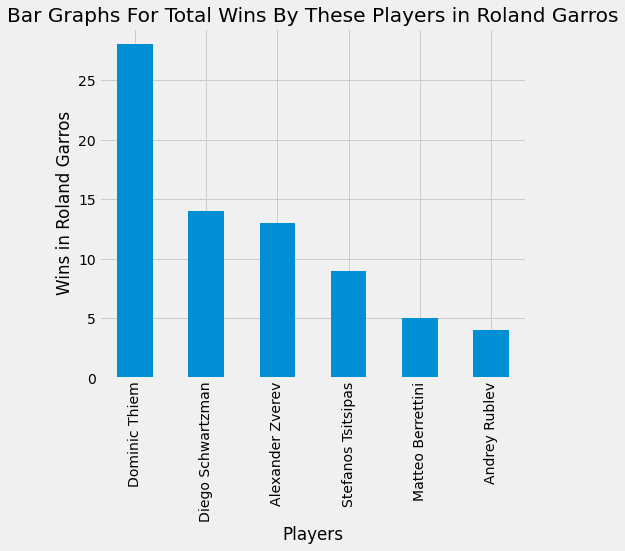

In [52]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt2 = rg.winner_name.value_counts().plot(kind='bar')
plt.title('Bar Graphs For Total Wins By These Players in Roland Garros')
plt2.set(xlabel = 'Players', ylabel='Wins in Roland Garros')

[Text(0.5, 0, 'Players'), Text(0, 0.5, 'Losses in Roland Garros')]

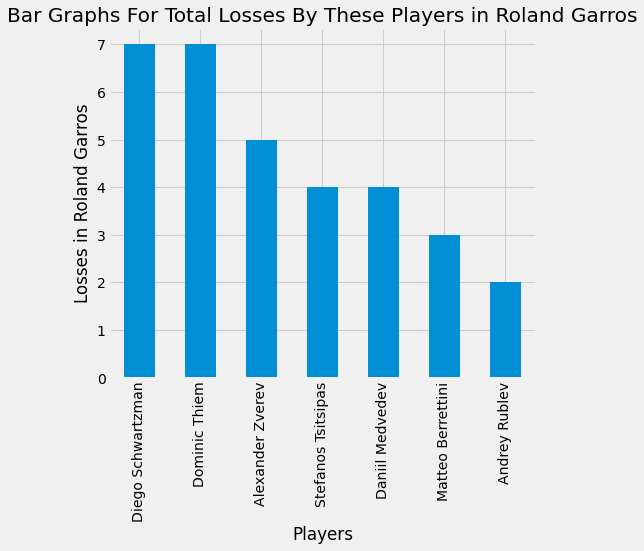

In [53]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt2 = rg.loser_name.value_counts().plot(kind='bar')
plt.title('Bar Graphs For Total Losses By These Players in Roland Garros')
plt2.set(xlabel = 'Players', ylabel='Losses in Roland Garros')

#### Insights:
- `Dominic Thiem` and `Diego Schwartzman` again have the most wins and losses as a pro being the oldest players in the lot.
- rest of them are not much of a "clay surface lovers".
- `Medvedev` is no where to be seen in the wins graph, clearly states he doesn't like the surface much!

### 6.3. Performances in The Wimbledon (Grass)

#### 6.3.1. Plotting Bar Graphs For Total Wins & Total Losses By These Players in Wimbledon

In [54]:
wmb = dbase[['Date','Player','winner_name','Rank','Tournament','Tournament_Level','Winner Seed','Round','loser_name']]

In [55]:
wmb = wmb[(wmb.Tournament == 'Wimbledon')]

[Text(0.5, 0, 'Players'), Text(0, 0.5, 'Wins in Wimbledon')]

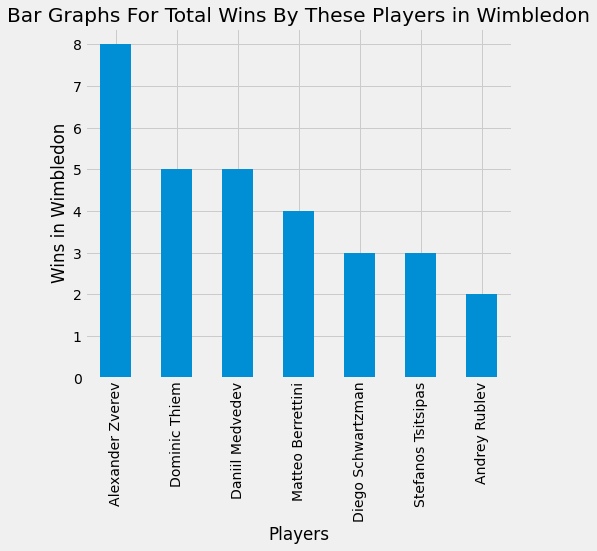

In [56]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt2 = wmb.winner_name.value_counts().plot(kind='bar')
plt.title('Bar Graphs For Total Wins By These Players in Wimbledon')
plt2.set(xlabel = 'Players', ylabel='Wins in Wimbledon')

[Text(0.5, 0, 'Players'), Text(0, 0.5, 'Losses in Wimbledon')]

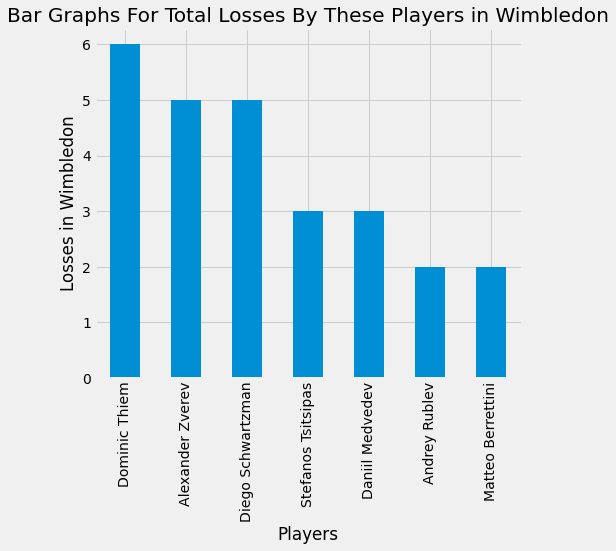

In [57]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt2 = wmb.loser_name.value_counts().plot(kind='bar')
plt.title('Bar Graphs For Total Losses By These Players in Wimbledon')
plt2.set(xlabel = 'Players', ylabel='Losses in Wimbledon')

#### Insights:
- `Zverev` has the best record on grass as compared to the other, also for the fisrt time experienced `Thiem` is behind him with soo much of experience and matches played which shows how excellent Zverev is on grass!
- `Medvedev` being second explains the courts he love has a speed factor to it, clay is slow and it irritates him. His style of play is more dependent on the power and speed he has when he hits the ball and how he moves on the surface!

### 6.4. Performances in the US Open (Hard Court)

#### 6.4.1. Plotting Bar Graphs For Total Wins & Total Losses By These Players in US Open

In [58]:
uso = dbase[['Date','Player','winner_name','Rank','Tournament','Tournament_Level','Winner Seed','Round','loser_name']]

In [59]:
uso = uso[(uso.Tournament == 'US Open')]

[Text(0.5, 0, 'Players'), Text(0, 0.5, 'Wins in US Open')]

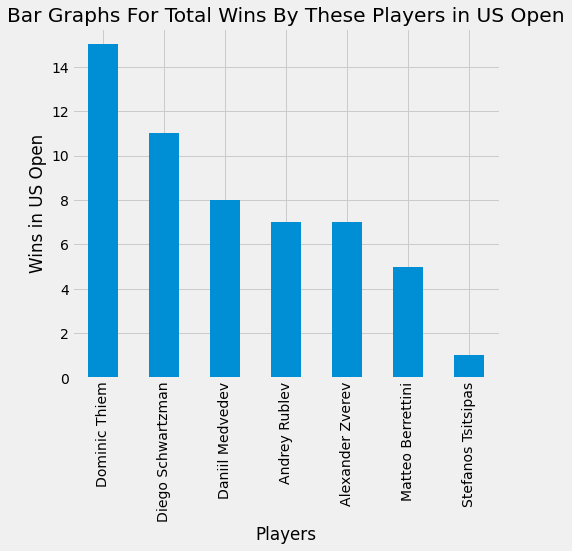

In [60]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt2 = uso.winner_name.value_counts().plot(kind='bar')
plt.title('Bar Graphs For Total Wins By These Players in US Open')
plt2.set(xlabel = 'Players', ylabel='Wins in US Open')

[Text(0.5, 0, 'Players'), Text(0, 0.5, 'Losses in US Open')]

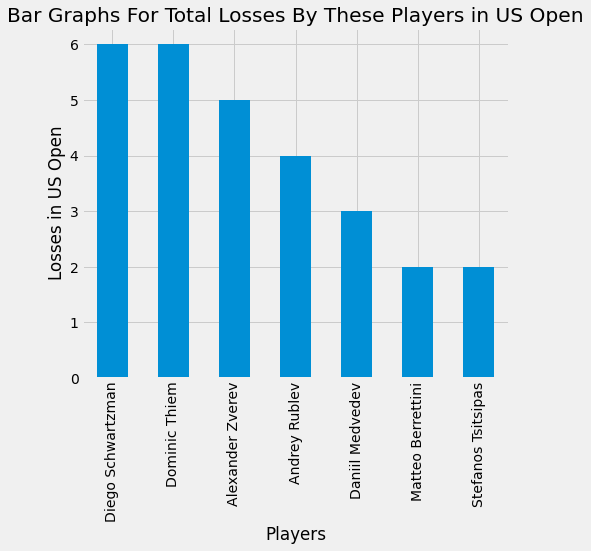

In [61]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt2 = uso.loser_name.value_counts().plot(kind='bar')
plt.title('Bar Graphs For Total Losses By These Players in US Open')
plt2.set(xlabel = 'Players', ylabel='Losses in US Open')

#### Insights:
- `Dominic Thiem` obviously being the best in US Open as he's the only player to win this tournament and also being the only player from the lot to win a grand slam title!
- `Daniil Medvedev` being in the middle of the charts proving our hypothesis of him loving the hard courts!
- `Zverev` is quite consistant again!

#### 6.5. Unfortunate Upsets in Grand Slams (i.e lost in R32, as top seeds enter the tournaments at that stage only):

In [62]:
upset = dbase[['Player','Tournament','Tournament_Level','Round','loser_name']]

In [63]:
upset = upset[(upset.Tournament_Level == 'G') & (upset.Round == 'R32')]

[Text(0.5, 0, 'Players'), Text(0, 0.5, 'Upsets')]

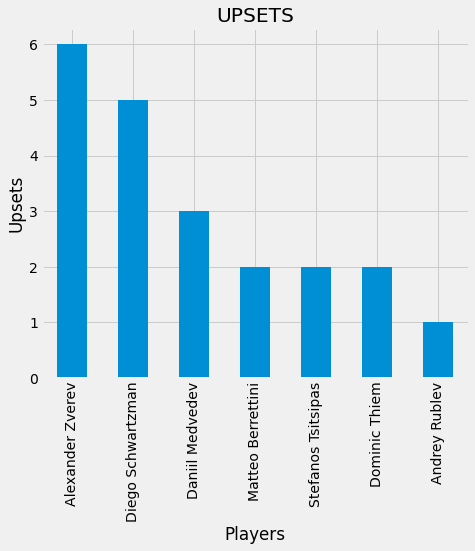

In [64]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt2 = upset.loser_name.value_counts().plot(kind='bar')
plt.title('UPSETS')
plt2.set(xlabel = 'Players', ylabel='Upsets')

- `Zverev` has the most upsets!

#### 6.6. Players with better mentality to fight back:

In [65]:
breaksave = dbase7ind[['winner_name','tourney_level','w_bpSaved','loser_name','l_bpSaved']]

In [66]:
breaksave = breaksave[(breaksave.tourney_level == 'G')]

<AxesSubplot:title={'center':'Players with most BP saved in a GRAND SLAM'}, ylabel='Player'>

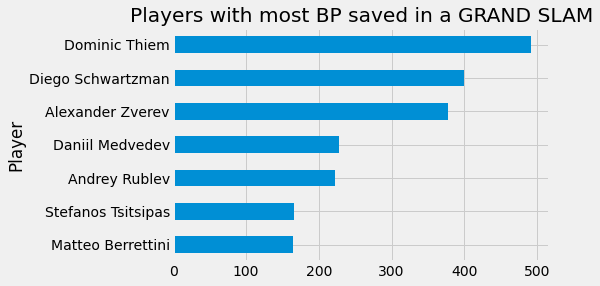

In [67]:
bsw = breaksave.groupby(['winner_name']).agg({'w_bpSaved':'sum'}).fillna(0).sort_values(['w_bpSaved'], ascending=False)
bsl = breaksave.groupby(['loser_name']).agg({'l_bpSaved':'sum'}).fillna(0).sort_values(['l_bpSaved'], ascending=False)
dfs = [bsw,bsl]
r = pd.concat(dfs, sort=False).reset_index().fillna(0)
r['dfs'] = r['l_bpSaved']+r['w_bpSaved']
final = r.groupby('index').agg({'dfs':'sum'}).sort_values('dfs',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','BreakPointsSaved']
final = final.sort_values('BreakPointsSaved',ascending=True)
final.plot('Player','BreakPointsSaved', kind='barh', title='Players with most BP saved in a GRAND SLAM', legend=False)

#### 6.7. Players with most ACEs in GRAND SLAMS

<AxesSubplot:title={'center':'Players with most ACEs in GRAND SLAMS'}, ylabel='Player'>

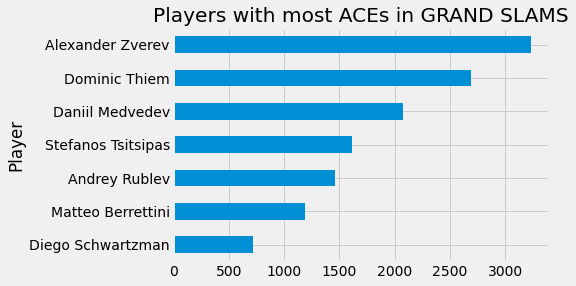

In [68]:
asw = dbase7ind.groupby(['winner_name']).agg({'w_ace':'sum'}).fillna(0).sort_values(['w_ace'], ascending=False)
asl = dbase7ind.groupby(['loser_name']).agg({'l_ace':'sum'}).fillna(0).sort_values(['l_ace'], ascending=False)
dfs = [asw,asl]
r = pd.concat(dfs, sort=False).reset_index().fillna(0)
r['dfs'] = r['l_ace']+r['w_ace']
final = r.groupby('index').agg({'dfs':'sum'}).sort_values('dfs',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','MostAces']
final = final.sort_values('MostAces',ascending=True)
final.plot('Player','MostAces', kind='barh', title='Players with most ACEs in GRAND SLAMS', legend=False)

#### 6.8. Players with most Double Faults in GRAND SLAMS

<AxesSubplot:title={'center':'Players with most Double Faults in GRAND SLAMS'}, ylabel='Player'>

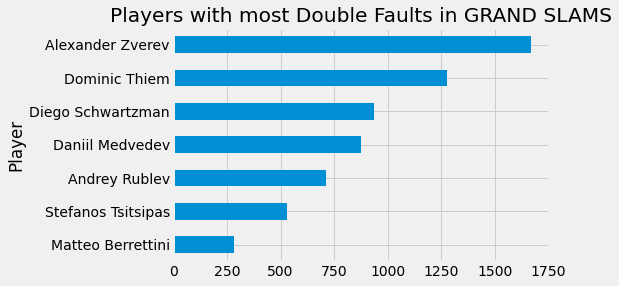

In [69]:
dasw = dbase7ind.groupby(['winner_name']).agg({'w_df':'sum'}).fillna(0).sort_values(['w_df'], ascending=False)
dasl = dbase7ind.groupby(['loser_name']).agg({'l_df':'sum'}).fillna(0).sort_values(['l_df'], ascending=False)
dfs = [dasw,dasl]
r = pd.concat(dfs, sort=False).reset_index().fillna(0)
r['dfs'] = r['l_df']+r['w_df']
final = r.groupby('index').agg({'dfs':'sum'}).sort_values('dfs',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','DoubleFaults']
final = final.sort_values('DoubleFaults',ascending=True)
final.plot('Player','DoubleFaults', kind='barh', title='Players with most Double Faults in GRAND SLAMS', legend=False)

### 7. Individual Player Analysis:

#### 7.1. Creating individual dataframes for INDIVIDUAL ANALYSIS of these players:

In [70]:
medvedev_w = indiv_w[indiv_w.winner_name == 'Daniil Medvedev']
medvedev_l = indiv_l[indiv_l.loser_name == 'Daniil Medvedev']

thiem_w =  indiv_w[indiv_w.winner_name == 'Dominic Thiem']
thiem_l =  indiv_l[indiv_l.loser_name == 'Dominic Thiem']

tsitsipas_w =  indiv_w[indiv_w.winner_name == 'Stefanos Tsitsipas']
tsitsipas_l =  indiv_l[indiv_l.loser_name == 'Stefanos Tsitsipas']

zverev_w =  indiv_w[indiv_w.winner_name == 'Alexander Zverev']
zverev_l =  indiv_l[indiv_l.loser_name == 'Alexander Zverev']

rublev_w =  indiv_w[indiv_w.winner_name == 'Andrey Rublev']
rublev_l =  indiv_l[indiv_l.loser_name == 'Andrey Rublev']

schwartzman_l =  indiv_w[indiv_w.winner_name == 'Diego Schwartzman']
schwartzman_l =  indiv_l[indiv_l.loser_name == 'Diego Schwartzman']

berrettini_l =  indiv_w[indiv_w.winner_name == 'Matteo Berrettini']
berrettini_l =  indiv_l[indiv_l.loser_name == 'Matteo Berrettini']

#### 7.2. Evolution of top players in the last 10 years:

#### 7.2.1. Plotting for `Dominic Thiem`

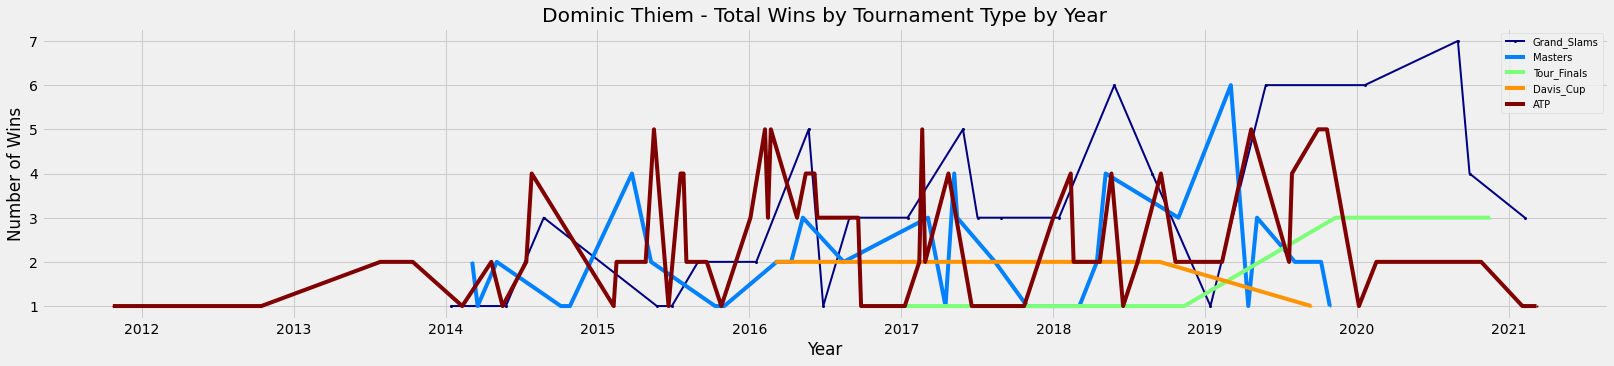

In [71]:
plthiem_1 = ltennis[(ltennis['winner_name'] == 'Dominic Thiem')].groupby(['tourney_date','tourney_level'], as_index=False).agg(['count'])
plthiem_2 = plthiem_1['tourney_id'].reset_index()
plthiem_2 = plthiem_2.sort_values(by=['tourney_date'])

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Dominic Thiem - Total Wins by Tournament Type by Year')
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.plot(plthiem_2[plthiem_2['tourney_level']=='G']['tourney_date'], plthiem_2[plthiem_2['tourney_level']=='G']['count'], marker='o', markerfacecolor='black', markersize=2, linewidth=2)
plt.plot(plthiem_2[plthiem_2['tourney_level']=='M']['tourney_date'], plthiem_2[plthiem_2['tourney_level']=='M']['count'], marker='o', markerfacecolor='black', markersize=1)
plt.plot(plthiem_2[plthiem_2['tourney_level']=='F']['tourney_date'], plthiem_2[plthiem_2['tourney_level']=='F']['count'], marker='o', markerfacecolor='black', markersize=1)
plt.plot(plthiem_2[plthiem_2['tourney_level']=='D']['tourney_date'], plthiem_2[plthiem_2['tourney_level']=='D']['count'], marker='o', markerfacecolor='black', markersize=1)
plt.plot(plthiem_2[plthiem_2['tourney_level']=='A']['tourney_date'], plthiem_2[plthiem_2['tourney_level']=='A']['count'], marker='o', markerfacecolor='black', markersize=1)

plt.legend(['Grand_Slams', 'Masters', 'Tour_Finals', 'Davis_Cup', 'ATP'], loc='upper right', prop={'size': 10})


#### 7.2.2. Plotting for `Stefanos Tsitsipas`

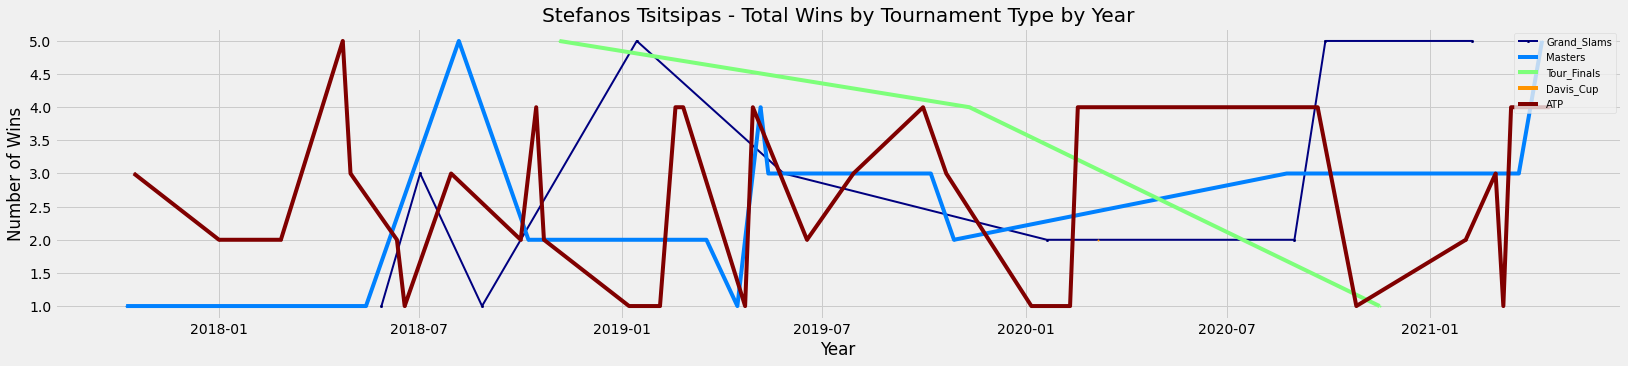

In [72]:
taplthiem_1 = ltennis[(ltennis['winner_name'] == 'Stefanos Tsitsipas')].groupby(['tourney_date','tourney_level'], as_index=False).agg(['count'])
taplthiem_2 = taplthiem_1['tourney_id'].reset_index()
taplthiem_2 = taplthiem_2.sort_values(by=['tourney_date'])

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Stefanos Tsitsipas - Total Wins by Tournament Type by Year')
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.plot(taplthiem_2[taplthiem_2['tourney_level']=='G']['tourney_date'], taplthiem_2[taplthiem_2['tourney_level']=='G']['count'], marker='o', markerfacecolor='black', markersize=2, linewidth=2)
plt.plot(taplthiem_2[taplthiem_2['tourney_level']=='M']['tourney_date'], taplthiem_2[taplthiem_2['tourney_level']=='M']['count'], marker='o', markerfacecolor='black', markersize=1)
plt.plot(taplthiem_2[taplthiem_2['tourney_level']=='F']['tourney_date'], taplthiem_2[taplthiem_2['tourney_level']=='F']['count'], marker='o', markerfacecolor='black', markersize=1)
plt.plot(taplthiem_2[taplthiem_2['tourney_level']=='D']['tourney_date'], taplthiem_2[taplthiem_2['tourney_level']=='D']['count'], marker='o', markerfacecolor='black', markersize=1)
plt.plot(taplthiem_2[taplthiem_2['tourney_level']=='A']['tourney_date'], taplthiem_2[taplthiem_2['tourney_level']=='A']['count'], marker='o', markerfacecolor='black', markersize=1)

plt.legend(['Grand_Slams', 'Masters', 'Tour_Finals', 'Davis_Cup', 'ATP'], loc='upper right', prop={'size': 10})



#### 7.2.3. Plotting For `Daniil Medvedev`

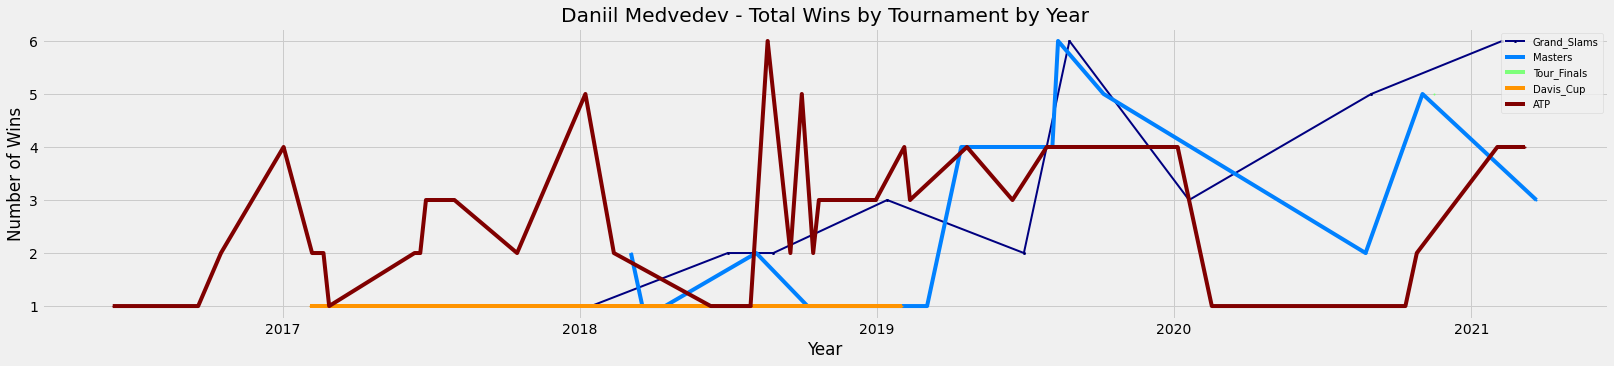

In [73]:
dplthiem_1 = ltennis[(ltennis['winner_name'] == 'Daniil Medvedev')].groupby(['tourney_date','tourney_level'], as_index=False).agg(['count'])
dplthiem_2 = dplthiem_1['tourney_id'].reset_index()
dplthiem_2 = dplthiem_2.sort_values(by=['tourney_date'])

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Daniil Medvedev - Total Wins by Tournament by Year')
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.plot(dplthiem_2[dplthiem_2['tourney_level']=='G']['tourney_date'], dplthiem_2[dplthiem_2['tourney_level']=='G']['count'], marker='o', markerfacecolor='black', markersize=2, linewidth=2)
plt.plot(dplthiem_2[dplthiem_2['tourney_level']=='M']['tourney_date'], dplthiem_2[dplthiem_2['tourney_level']=='M']['count'], marker='o', markerfacecolor='black', markersize=1)
plt.plot(dplthiem_2[dplthiem_2['tourney_level']=='F']['tourney_date'], dplthiem_2[dplthiem_2['tourney_level']=='F']['count'], marker='o', markerfacecolor='black', markersize=1)
plt.plot(dplthiem_2[dplthiem_2['tourney_level']=='D']['tourney_date'], dplthiem_2[dplthiem_2['tourney_level']=='D']['count'], marker='o', markerfacecolor='black', markersize=1)
plt.plot(dplthiem_2[dplthiem_2['tourney_level']=='A']['tourney_date'], dplthiem_2[dplthiem_2['tourney_level']=='A']['count'], marker='o', markerfacecolor='black', markersize=1)

plt.legend(['Grand_Slams', 'Masters', 'Tour_Finals', 'Davis_Cup', 'ATP'], loc='upper right', prop={'size': 10})


#### 7.2.4. Plotting For `Alexander Zverev`

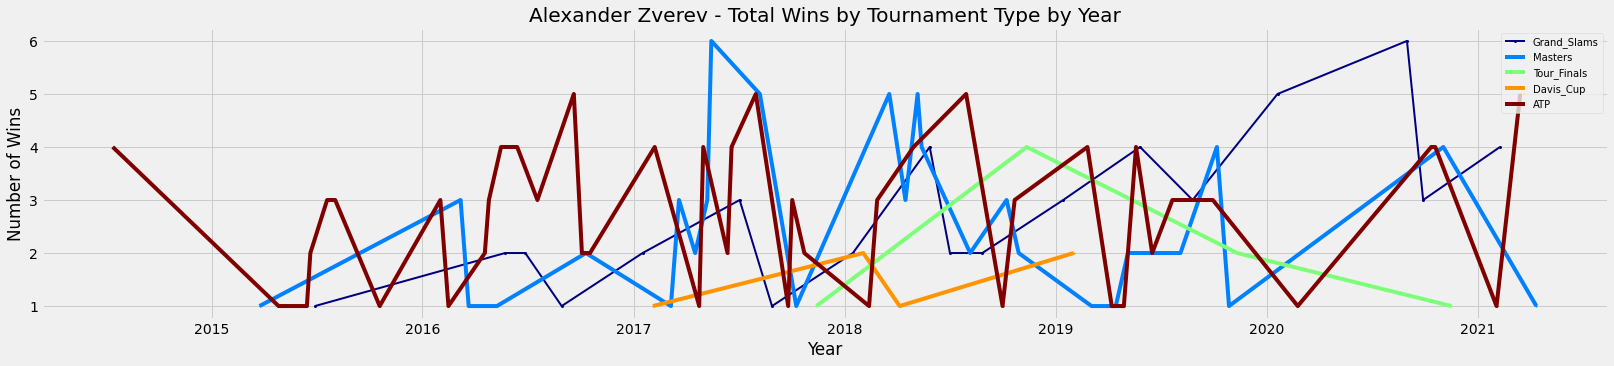

In [75]:
zplthiem_1 = ltennis[(ltennis['winner_name'] == 'Alexander Zverev')].groupby(['tourney_date','tourney_level'], as_index=False).agg(['count'])
zplthiem_2 = zplthiem_1['tourney_id'].reset_index()
zplthiem_2 = zplthiem_2.sort_values(by=['tourney_date'])

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Alexander Zverev - Total Wins by Tournament Type by Year')
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.plot(zplthiem_2[zplthiem_2['tourney_level']=='G']['tourney_date'], zplthiem_2[zplthiem_2['tourney_level']=='G']['count'], marker='o', markerfacecolor='black', markersize=2, linewidth=2)
plt.plot(zplthiem_2[zplthiem_2['tourney_level']=='M']['tourney_date'], zplthiem_2[zplthiem_2['tourney_level']=='M']['count'], marker='o', markerfacecolor='black', markersize=1)
plt.plot(zplthiem_2[zplthiem_2['tourney_level']=='F']['tourney_date'], zplthiem_2[zplthiem_2['tourney_level']=='F']['count'], marker='o', markerfacecolor='black', markersize=1)
plt.plot(zplthiem_2[zplthiem_2['tourney_level']=='D']['tourney_date'], zplthiem_2[zplthiem_2['tourney_level']=='D']['count'], marker='o', markerfacecolor='black', markersize=1)
plt.plot(zplthiem_2[zplthiem_2['tourney_level']=='A']['tourney_date'], zplthiem_2[zplthiem_2['tourney_level']=='A']['count'], marker='o', markerfacecolor='black', markersize=1)

plt.legend(['Grand_Slams', 'Masters', 'Tour_Finals', 'Davis_Cup', 'ATP'], loc='upper right', prop={'size': 10})


### 8. Analysis on Individual Players on Each Surface:

#### 8.1. creating a dataframe for `surface` with winner name loser name and surface as columns, making them for both wins and losses and further merging the wins and losses columns as one DF!

In [76]:
surfac = dbase7[['surface','winner_name','loser_name']]

In [77]:
surfac_w = surfac[['surface', 'winner_name']]
surfac_l = surfac[['surface', 'loser_name']]
surfac_w.columns = ['surface', 'Player']
surfac_l.columns = ['surface', 'Player']

In [78]:
surfac_w['idx'] = range(1, len(surfac_w) + 1)
surfac_l['idx'] = range(1, len(surfac_l) + 1)

In [79]:
surfac_w = surfac_w.groupby(['surface', 'Player']).count()
surfac_w = surfac_w.reset_index()
surfac_w.columns = ['surface', 'Player', 'Count_Win']

surfac_l = surfac_l.groupby(['surface', 'Player']).count()
surfac_l = surfac_l.reset_index()
surfac_l.columns = ['surface', 'Player', 'Count_Lose']

In [80]:
surfac = pd.merge(surfac_w, surfac_l, on=['surface', 'Player'])

In [81]:
surfac['total_play'] = surfac['Count_Win'] + surfac['Count_Lose']

In [82]:
surfac['perc_win'] = round(surfac['Count_Win'] / surfac['total_play'],4)*100

In [83]:
surfac = surfac[surfac.total_play > 60]

In [84]:
surfac.sort_values(by='perc_win', ascending=False).head(30)


,surface,Player,Count_Win,Count_Lose,total_play,perc_win
4,Clay,Dominic Thiem,140,48,188,74.47
6,Clay,Stefanos Tsitsipas,47,17,64,73.44
16,Hard,Daniil Medvedev,146,56,202,72.28
0,Clay,Alexander Zverev,78,34,112,69.64
14,Hard,Alexander Zverev,155,82,237,65.40
20,Hard,Stefanos Tsitsipas,106,58,164,64.63
15,Hard,Andrey Rublev,122,70,192,63.54
18,Hard,Dominic Thiem,149,100,249,59.84
3,Clay,Diego Schwartzman,90,66,156,57.69
17,Hard,Diego Schwartzman,85,74,159,53.46


In [85]:
surfac.surface.unique()

array(['Clay', 'Hard'], dtype=object)

#### So the top players are:
- Dominic Thiem 
- Stefanos Tsitsipas 
- Alexander Zverev

In [86]:
apw = ltennis[(ltennis['winner_name'] == 'Dominic Thiem')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
apww = apw['tourney_id'].reset_index()

apl = ltennis[(ltennis['loser_name'] == 'Dominic Thiem')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
apll = apl['tourney_id'].reset_index()


zpw = ltennis[(ltennis['winner_name'] == 'Alexander Zverev')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
zpww = zpw['tourney_id'].reset_index()

zpl = ltennis[(ltennis['loser_name'] == 'Alexander Zverev')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
zpll = zpl['tourney_id'].reset_index()


spw = ltennis[(ltennis['winner_name'] == 'Stefanos Tsitsipas')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
spww = spw['tourney_id'].reset_index()

spl = ltennis[(ltennis['loser_name'] == 'Stefanos Tsitsipas')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
spll = spl['tourney_id'].reset_index()


#### Effectiveness for Dominic Thiem:

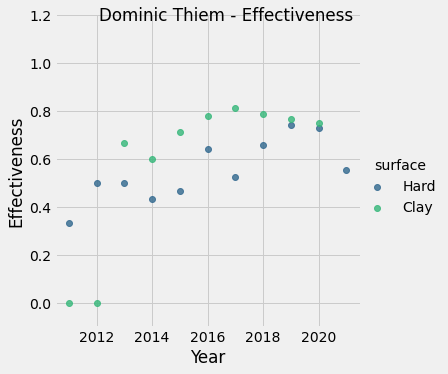

In [87]:
apww.columns = ['tourney_year','surface','wins']
apll.columns = ['tourney_year','surface','loses']

dfs = (apww,apll)

dfs_concat = pd.concat(dfs, sort=False)

dfs_final = dfs_concat.fillna(0).groupby(['tourney_year','surface']).agg({'wins':'sum','loses':'sum'}).reset_index()

dfs_final['r_eff'] = np.where(dfs_final['loses']>0, dfs_final['wins']/(dfs_final['wins']+dfs_final['loses']), 1)
dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)

g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard','Clay'])
g.fig.suptitle('Dominic Thiem - Effectiveness')
g.set(xlabel='Year', ylabel='Effectiveness')
g.set(ylim=(-0.1,1.2))

#### Effectiveness for Alexander Zverev:

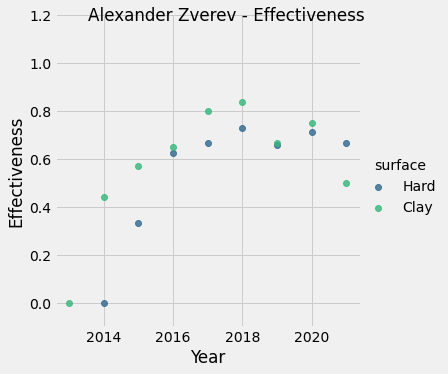

In [88]:
zpww.columns = ['tourney_year','surface','wins']
zpll.columns = ['tourney_year','surface','loses']

dfs = (zpww,zpll)

dfs_concat = pd.concat(dfs, sort=False)

dfs_final = dfs_concat.fillna(0).groupby(['tourney_year','surface']).agg({'wins':'sum','loses':'sum'}).reset_index()

dfs_final['r_eff'] = np.where(dfs_final['loses']>0, dfs_final['wins']/(dfs_final['wins']+dfs_final['loses']), 1)
dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)

g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard','Clay'])
g.fig.suptitle('Alexander Zverev - Effectiveness')
g.set(xlabel='Year', ylabel='Effectiveness')
g.set(ylim=(-0.1,1.2))

#### Effectiveness for Stefanos Tsitsipas:

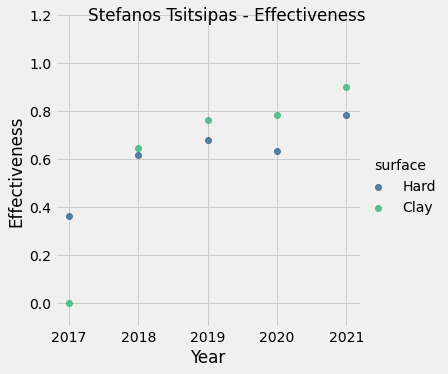

In [89]:
spww.columns = ['tourney_year','surface','wins']
spll.columns = ['tourney_year','surface','loses']

dfs = (spww,spll)

dfs_concat = pd.concat(dfs, sort=False)

dfs_final = dfs_concat.fillna(0).groupby(['tourney_year','surface']).agg({'wins':'sum','loses':'sum'}).reset_index()

dfs_final['r_eff'] = np.where(dfs_final['loses']>0, dfs_final['wins']/(dfs_final['wins']+dfs_final['loses']), 1)
dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)

g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard','Clay'])
g.fig.suptitle('Stefanos Tsitsipas - Effectiveness')
g.set(xlabel='Year', ylabel='Effectiveness')
g.set(ylim=(-0.1,1.2))

#### Calculating The Mean Surface of players to determine the ALL ROUND PLAYER:

In [90]:
surface_top = surfac[(surfac.Player.isin(['Daniil Medvedev',
'Dominic Thiem',
'Stefanos Tsitsipas',
'Alexander Zverev',
'Andrey Rublev',
'Diego Schwartzman',
'Matteo Berrettini'])) & (surfac.surface != 'Carpet')]
surface_top

,surface,Player,Count_Win,Count_Lose,total_play,perc_win
0,Clay,Alexander Zverev,78,34,112,69.64
3,Clay,Diego Schwartzman,90,66,156,57.69
4,Clay,Dominic Thiem,140,48,188,74.47
6,Clay,Stefanos Tsitsipas,47,17,64,73.44
14,Hard,Alexander Zverev,155,82,237,65.40
15,Hard,Andrey Rublev,122,70,192,63.54
16,Hard,Daniil Medvedev,146,56,202,72.28
17,Hard,Diego Schwartzman,85,74,159,53.46
18,Hard,Dominic Thiem,149,100,249,59.84
19,Hard,Matteo Berrettini,38,35,73,52.05


In [91]:
surface_top = pd.pivot_table(surface_top, values='perc_win', columns=['surface'], index=['Player'])
surface_top.index.names

FrozenList(['Player'])

In [92]:
surface_top[surface_top.index == "Alexander Zverev"]

surface,Clay,Hard
Player,,
Alexander Zverev,69.64,65.4


In [93]:
surface_top[surface_top.index == "Dominic Thiem"]

surface,Clay,Hard
Player,,
Dominic Thiem,74.47,59.84


In [94]:
surface_top[surface_top.index == "Stefanos Tsitsipas"]

surface,Clay,Hard
Player,,
Stefanos Tsitsipas,73.44,64.63


In [95]:
surface_top[surface_top.index == "Daniil Medvedev"]

surface,Clay,Hard
Player,,
Daniil Medvedev,NaN,72.28


In [96]:
surface_top[surface_top.index == "Diego Schwartzman"]

surface,Clay,Hard
Player,,
Diego Schwartzman,57.69,53.46


In [97]:
surface_top[surface_top.index == "Andrey Rublev"]

surface,Clay,Hard
Player,,
Andrey Rublev,NaN,63.54


#### Finding out the best player in top 5:

In [98]:
surface_top['mean_surface'] = surface_top.iloc[:, 1:].sum(axis=1) / 2

In [99]:
surface_top.head()

surface,Clay,Hard,mean_surface
Player,,,
Alexander Zverev,69.64,65.40,32.70
Andrey Rublev,NaN,63.54,31.77
Daniil Medvedev,NaN,72.28,36.14
Diego Schwartzman,57.69,53.46,26.73
Dominic Thiem,74.47,59.84,29.92


#### clearly due to "NaN" values Rublev and Medvedev are very high on the table which is not possible. so our top choices are
- Alexander Zverev
- Dominic Thiem
- Diego Schwartzman

#### So, according to the analysis the best all round player keeping the surface, slams, wins and losses in mind is:
`Alexandar Zverev`